In [14]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [15]:
df_barris = pd.read_csv('data/HABITATGE_LLOGUER_BARRIS_25.csv', delimiter=';')
df_barris
type(df_barris["GEOMETRIA"].iloc[0])

str

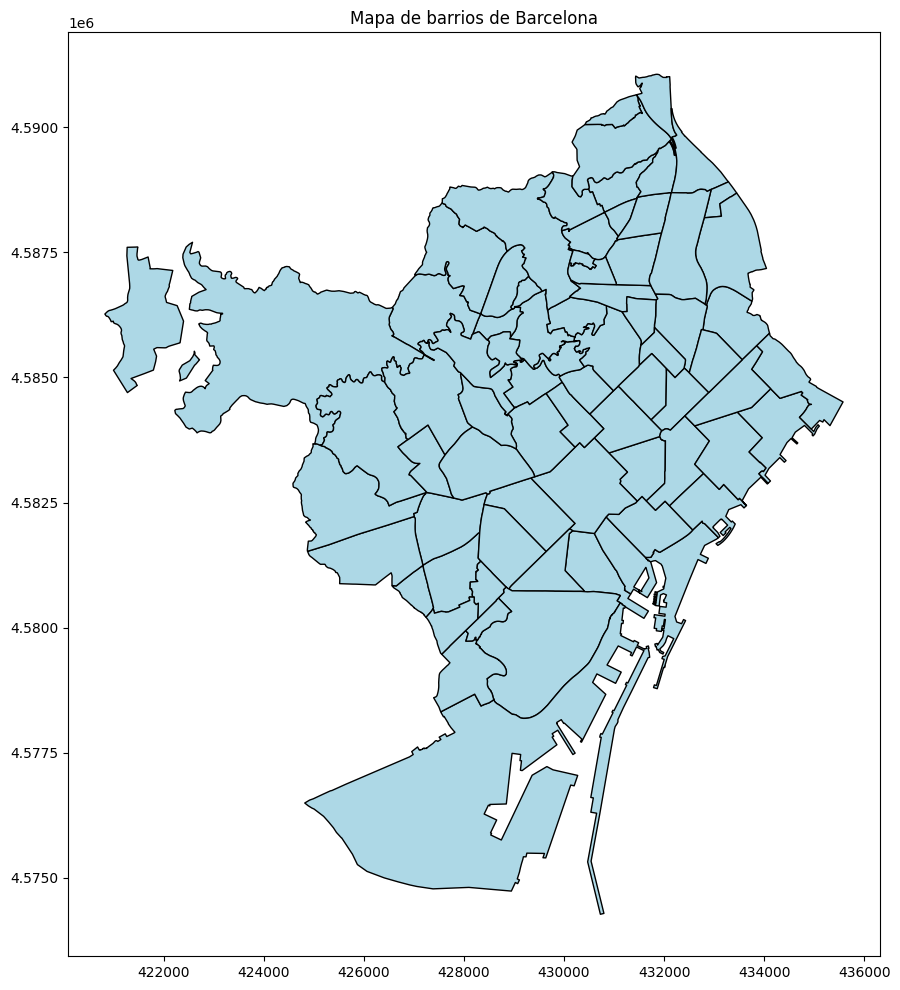

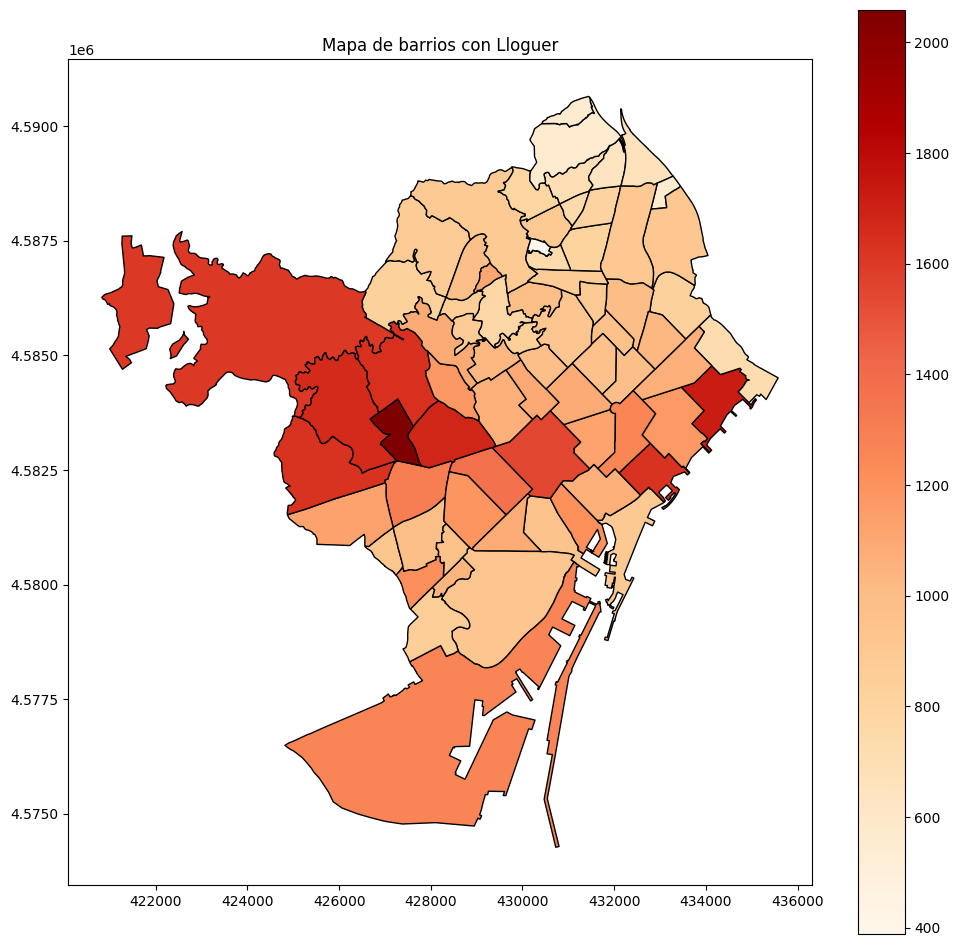

In [16]:
from shapely import wkt

if isinstance(df_barris["GEOMETRIA"].iloc[0], str):
    df_barris["GEOMETRIA"] = df_barris["GEOMETRIA"].apply(wkt.loads)
# Mantener solo geometrías válidas
df_barris = df_barris[df_barris["GEOMETRIA"].notna()]
df_barris = df_barris[df_barris["GEOMETRIA"].apply(lambda x: x.is_valid)]
import geopandas as gpd

gdf_barris = gpd.GeoDataFrame(df_barris, geometry="GEOMETRIA")

# Asignar CRS
gdf_barris = gdf_barris.set_crs(epsg=3857)  # si tus coordenadas están en metros
# O si están en lat/lon: epsg=4326
fig, ax = plt.subplots(figsize=(12,12))
gdf_barris.plot(edgecolor="black", color="lightblue", ax=ax)
plt.title("Mapa de barrios de Barcelona")
plt.show()

fig, ax = plt.subplots(figsize=(12,12))
gdf_barris.plot(column="LLOGUER", cmap="OrRd", legend=True, edgecolor="black", ax=ax)
plt.title("Mapa de barrios con Lloguer")
plt.show()



In [34]:


df_district_barri = pd.DataFrame([
    # CIUTAT VELLA
    ("CIUTAT VELLA", "el Raval  "),
    ("CIUTAT VELLA", "el Barri Gòtic  "),
    ("CIUTAT VELLA", "la Barceloneta  "),
    ("CIUTAT VELLA", "Sant Pere, Santa Caterina i la Ribera  "),

    # EIXAMPLE
    ("EIXAMPLE", "el Fort Pienc  "),
    ("EIXAMPLE", "la Sagrada Família  "),
    ("EIXAMPLE", "la Dreta de l'Eixample  "),
    ("EIXAMPLE", "l'Antiga Esquerra de l'Eixample  "),
    ("EIXAMPLE", "la Nova Esquerra de l'Eixample  "),
    ("EIXAMPLE", "Sant Antoni  "),

    # SANTS - MONTJUÏC
    ("SANTS - MONTJUÏC", "el Poble Sec"),
    ("SANTS - MONTJUÏC", "la Marina del Prat Vermell"),
    ("SANTS - MONTJUÏC", "la Marina de Port  "),
    ("SANTS - MONTJUÏC", "la Font de la Guatlla  "),
    ("SANTS - MONTJUÏC", "Hostafrancs  "),
    ("SANTS - MONTJUÏC", "la Bordeta  "),
    ("SANTS - MONTJUÏC", "Sants  "),
    ("SANTS - MONTJUÏC", "Sants - Badal  "),

    # LES CORTS
    ("LES CORTS", "les Corts  "),
    ("LES CORTS", "la Maternitat i Sant Ramon  "),
    ("LES CORTS", "Pedralbes  "),

    # SARRIÀ - SANT GERVASI
    ("SARRIÀ - SANT GERVASI", "Sarrià  "),
    ("SARRIÀ - SANT GERVASI", "les Tres Torres  "),
    ("SARRIÀ - SANT GERVASI", "Sant Gervasi - la Bonanova  "),
    ("SARRIÀ - SANT GERVASI", "Sant Gervasi - Galvany  "),
    ("SARRIÀ - SANT GERVASI", "el Putxet i el Farró  "),
    ("SARRIÀ - SANT GERVASI", "Vallvidrera, el Tibidabo i les Planes  "),

    # GRÀCIA
    ("GRÀCIA", "la Salut  "),
    ("GRÀCIA", "la Vila de Gràcia  "),
    ("GRÀCIA", "el Camp d'en Grassot i Gràcia Nova  "),
    ("GRÀCIA", "el Coll  "),
    ("GRÀCIA", "Vallcarca i els Penitents  "),

    # HORTA - GUINARDÓ
    ("HORTA - GUINARDÓ", "el Baix Guinardó  "),
    ("HORTA - GUINARDÓ", "Can Baró  "),
    ("HORTA - GUINARDÓ", "el Guinardó  "),
    ("HORTA - GUINARDÓ", "la Font d'en Fargues  "),
    ("HORTA - GUINARDÓ", "el Carmel  "),
    ("HORTA - GUINARDÓ", "la Teixonera  "),
    ("HORTA - GUINARDÓ", "Sant Genís dels Agudells  "),
    ("HORTA - GUINARDÓ", "Montbau  "),
    ("HORTA - GUINARDÓ", "la Vall d'Hebron  "),
    ("HORTA - GUINARDÓ", "la Clota  "),
    ("HORTA - GUINARDÓ", "Horta  "),

    # NOU BARRIS
    ("NOU BARRIS", "Vilapicina i la Torre Llobeta  "),
    ("NOU BARRIS", "la Guineueta  "),
    ("NOU BARRIS", "les Roquetes  "),
    ("NOU BARRIS", "Porta  "),
    ("NOU BARRIS", "el Turó de la Peira  "),
    ("NOU BARRIS", "Can Peguera  "),
    ("NOU BARRIS", "Canyelles  "),
    ("NOU BARRIS", "Verdun  "),
    ("NOU BARRIS", "la Prosperitat  "),
    ("NOU BARRIS", "la Trinitat Nova  "),
    ("NOU BARRIS", "Torre Baró  "),
    ("NOU BARRIS", "Ciutat Meridiana  "),
    ("NOU BARRIS", "Vallbona  "),

    # SANT ANDREU
    ("SANT ANDREU", "la Trinitat Vella  "),
    ("SANT ANDREU", "Baró de Viver  "),
    ("SANT ANDREU", "el Bon Pastor  "),
    ("SANT ANDREU", "Sant Andreu  "),
    ("SANT ANDREU", "la Sagrera  "),
    ("SANT ANDREU", "el Congrés i els Indians  "),
    ("SANT ANDREU", "Navas  "),

    # SANT MARTÍ
    ("SANT MARTÍ", "el Camp de l'Arpa del Clot  "),
    ("SANT MARTÍ", "el Clot  "),
    ("SANT MARTÍ", "el Parc i la Llacuna del Poblenou  "),
    ("SANT MARTÍ", "la Vila Olímpica del Poblenou  "),
    ("SANT MARTÍ", "el Poblenou  "),
    ("SANT MARTÍ", "Diagonal Mar i el Front Marítim del Poblenou  "),
    ("SANT MARTÍ", "el Besòs i el Maresme  "),
    ("SANT MARTÍ", "Provençals del Poblenou  "),
    ("SANT MARTÍ", "Sant Martí de Provençals  "),
    ("SANT MARTÍ", "la Verneda i la Pau  "),
], columns=["Districte", "BARRI_BCN"])

# Normalizar espacios en los nombres de barrios
df_barris["BARRI_BCN"] = df_barris["BARRI_BCN"].str.strip()
df_district_barri["BARRI_BCN"] = df_district_barri["BARRI_BCN"].str.strip()


df_district_barri


,Districte,BARRI_BCN
0,CIUTAT VELLA,el Raval
1,CIUTAT VELLA,el Barri Gòtic
2,CIUTAT VELLA,la Barceloneta
3,CIUTAT VELLA,"Sant Pere, Santa Caterina i la Ribera"
4,EIXAMPLE,el Fort Pienc
...,...,...
68,SANT MARTÍ,Diagonal Mar i el Front Marítim del Poblenou
69,SANT MARTÍ,el Besòs i el Maresme
70,SANT MARTÍ,Provençals del Poblenou
71,SANT MARTÍ,Sant Martí de Provençals


In [18]:
df_data = pd.read_csv('data/data_aprobados_colegio_barrio.csv', delimiter=';')

df_bcn = df_data[df_data['Municipi'] == 'BARCELONA']

df_bcn_filtered=df_bcn[['Sexe',"Resultat", 'Alumnes avaluats','Districte']].copy()

df_bcn_filtered


,Sexe,Resultat,Alumnes avaluats,Districte
0,DONA,PROMOCIONEN AMB PENDENTS,1,CIUTAT VELLA
1,DONA,PROMOCIONEN SENSE PENDENTS,13,CIUTAT VELLA
2,HOME,PROMOCIONEN AMB PENDENTS,3,CIUTAT VELLA
3,HOME,PROMOCIONEN SENSE PENDENTS,14,CIUTAT VELLA
4,DONA,PROMOCIONEN AMB PENDENTS,3,CIUTAT VELLA
...,...,...,...,...
1197,DONA,PROMOCIONEN AMB PENDENTS,114,SANT MARTÍ
1198,DONA,PROMOCIONEN SENSE PENDENTS,351,SANT MARTÍ
1199,HOME,NO PROMOCIONEN,76,SANT MARTÍ
1200,HOME,PROMOCIONEN AMB PENDENTS,180,SANT MARTÍ


In [19]:
df_barris

df1_merged = df_barris.merge(df_district_barri, on="BARRI_BCN", how="left")

df_lloguer_district = (
    df1_merged
    .groupby("Districte")["LLOGUER"]
    .mean()
    .reset_index()
)

df_final = df_bcn_filtered.merge(df_lloguer_district, on="Districte", how="left")

df_final


,Sexe,Resultat,Alumnes avaluats,Districte,LLOGUER
0,DONA,PROMOCIONEN AMB PENDENTS,1,CIUTAT VELLA,1028.299454
1,DONA,PROMOCIONEN SENSE PENDENTS,13,CIUTAT VELLA,1028.299454
2,HOME,PROMOCIONEN AMB PENDENTS,3,CIUTAT VELLA,1028.299454
3,HOME,PROMOCIONEN SENSE PENDENTS,14,CIUTAT VELLA,1028.299454
4,DONA,PROMOCIONEN AMB PENDENTS,3,CIUTAT VELLA,1028.299454
...,...,...,...,...,...
1197,DONA,PROMOCIONEN AMB PENDENTS,114,SANT MARTÍ,1136.358554
1198,DONA,PROMOCIONEN SENSE PENDENTS,351,SANT MARTÍ,1136.358554
1199,HOME,NO PROMOCIONEN,76,SANT MARTÍ,1136.358554
1200,HOME,PROMOCIONEN AMB PENDENTS,180,SANT MARTÍ,1136.358554


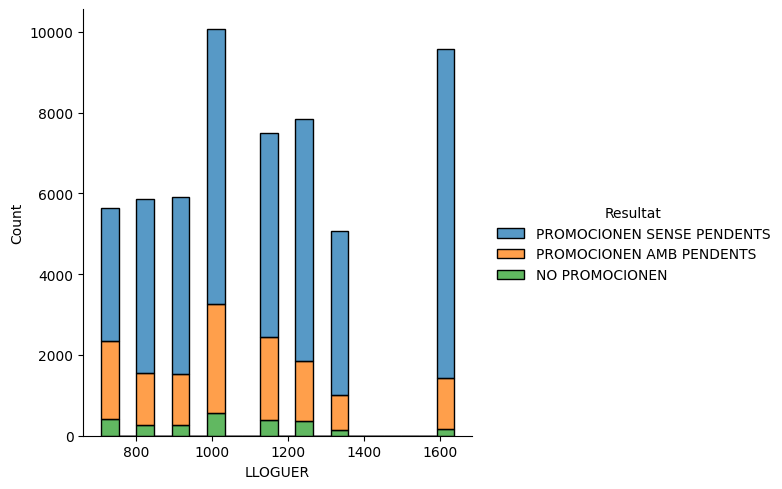

In [20]:

orden_resultats = ["PROMOCIONEN SENSE PENDENTS", "PROMOCIONEN AMB PENDENTS", "NO PROMOCIONEN"]
sns.displot(
    data=df_final,
    x="LLOGUER",
    weights="Alumnes avaluats",
    hue="Resultat",
    hue_order=orden_resultats,
    kind="hist",
    bins=20,
    multiple="stack"   # o "layer" o "dodge"
)



plt.show()


C:\Users\anica\AppData\Local\Temp\ipykernel_52136\3376956360.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["LLOGUER_BIN", "Resultat"])["Alumnes avaluats"]
C:\Users\anica\AppData\Local\Temp\ipykernel_52136\3376956360.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped.groupby("LLOGUER_BIN")["Alumnes avaluats"].transform("sum")


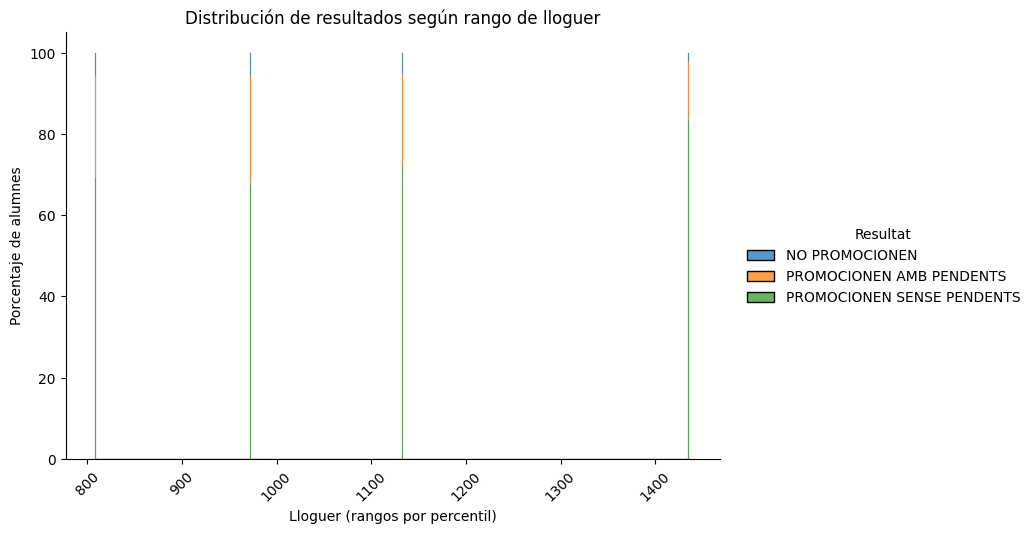

In [21]:

percentiles = np.percentile(df_final["LLOGUER"], [0, 25, 50, 75, 100])
df_final["LLOGUER_BIN"] = pd.cut(df_final["LLOGUER"], bins=percentiles, include_lowest=True)

# 2. Agrupar por rango y resultado, sumando alumnos
grouped = (
    df_final
    .groupby(["LLOGUER_BIN", "Resultat"])["Alumnes avaluats"]
    .sum()
    .reset_index()
)

# 3. Calcular porcentaje dentro de cada rango de alquiler
grouped["percent"] = (
    grouped["Alumnes avaluats"] /
    grouped.groupby("LLOGUER_BIN")["Alumnes avaluats"].transform("sum")
) * 100


grouped["LLOGUER_BIN_mid"] = grouped["LLOGUER_BIN"].apply(lambda x: x.mid)
sns.displot(
    data=grouped,
    x="LLOGUER_BIN_mid",
    weights="percent",
    hue="Resultat",
    multiple="stack",
    kind="hist",
    bins=6,
    height=5,
    aspect=1.5
)


plt.xticks(rotation=45)
plt.xlabel("Lloguer (rangos por percentil)")
plt.ylabel("Porcentaje de alumnes")
plt.title("Distribución de resultados según rango de lloguer")
plt.show()


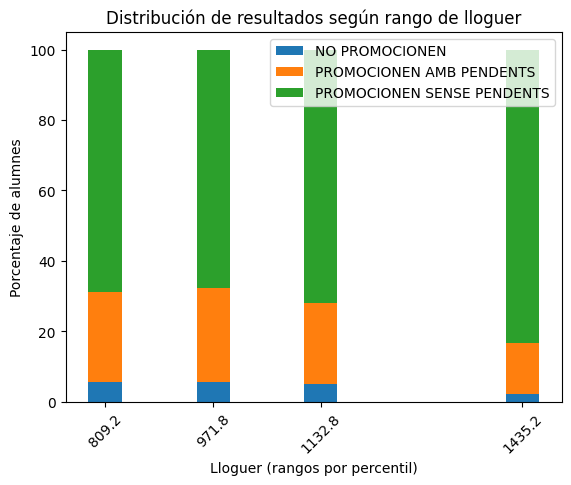

In [22]:
import matplotlib.pyplot as plt

# Obtener los midpoints y etiquetas de bins
midpoints = grouped["LLOGUER_BIN_mid"].unique()

# Lista de Resultat únicos
resultats = grouped["Resultat"].unique()

# Crear un diccionario con los datos apilados
percent_dict = {}
for r in resultats:
    percent_dict[r] = grouped.loc[grouped["Resultat"] == r, "percent"].values

# Crear gráfico de barras apiladas
width = 50  # ancho de barra (ajústalo a tu rango de LLOGUER)

bottom = np.zeros(len(midpoints))
for r in resultats:
    plt.bar(midpoints, percent_dict[r], width=width, bottom=bottom, label=r)
    bottom += percent_dict[r]  # apilar

plt.xlabel("Lloguer (rangos por percentil)")
plt.ylabel("Porcentaje de alumnes")
plt.title("Distribución de resultados según rango de lloguer")
plt.xticks(midpoints, rotation=45)
plt.legend()
plt.show()


In [23]:
df_final
grouped

,LLOGUER_BIN,Resultat,Alumnes avaluats,percent,LLOGUER_BIN_mid
0,"(706.7620000000001, 911.615]",NO PROMOCIONEN,946,5.435220,809.1885
1,"(706.7620000000001, 911.615]",PROMOCIONEN AMB PENDENTS,4477,25.722494,809.1885
2,"(706.7620000000001, 911.615]",PROMOCIONEN SENSE PENDENTS,11982,68.842287,809.1885
3,"(911.615, 1031.934]",NO PROMOCIONEN,553,5.495379,971.7745
4,"(911.615, 1031.934]",PROMOCIONEN AMB PENDENTS,2702,26.850840,971.7745
5,"(911.615, 1031.934]",PROMOCIONEN SENSE PENDENTS,6808,67.653781,971.7745
6,"(1031.934, 1233.62]",NO PROMOCIONEN,761,4.958947,1132.7770
7,"(1031.934, 1233.62]",PROMOCIONEN AMB PENDENTS,3520,22.937573,1132.7770
8,"(1031.934, 1233.62]",PROMOCIONEN SENSE PENDENTS,11065,72.103480,1132.7770
9,"(1233.62, 1636.875]",NO PROMOCIONEN,294,2.006415,1435.2475


C:\Users\anica\AppData\Local\Temp\ipykernel_52136\944441220.py:14: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(


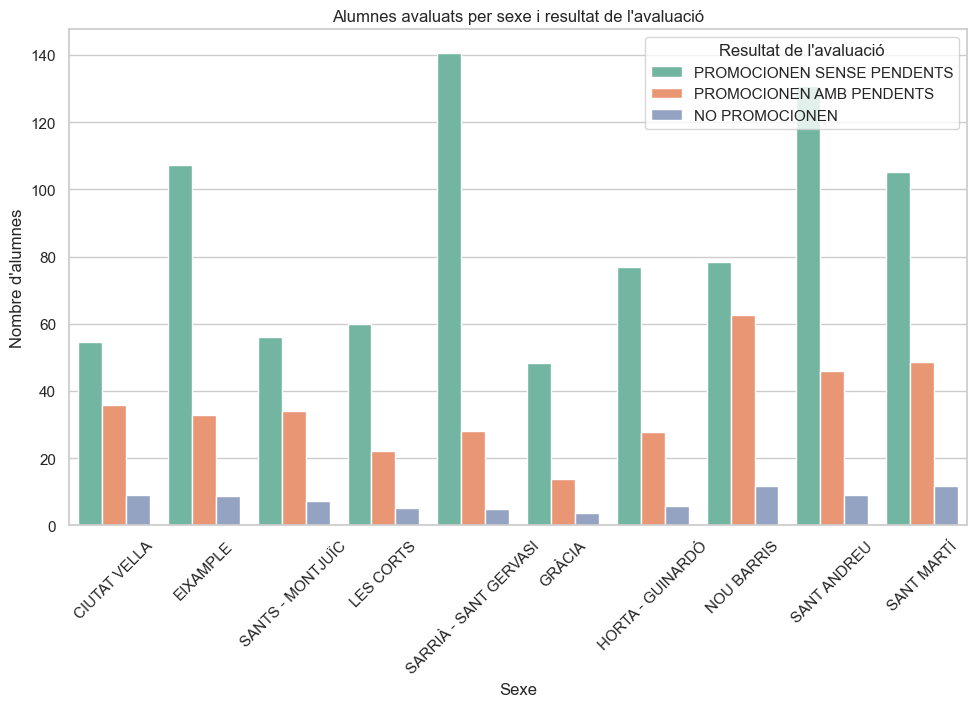

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Suponiendo que tu DataFrame se llama df ---
# Aseguramos el orden lógico de las categorías:
orden_resultats = ["PROMOCIONEN SENSE PENDENTS", "PROMOCIONEN AMB PENDENTS", "NO PROMOCIONEN"]

sns.set(style="whitegrid")

palette_1=sns.color_palette("rocket_r", as_cmap=True)
palette_2=sns.color_palette("Set2")

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_bcn_filtered,
    x="Districte",
    y="Alumnes avaluats",
    hue="Resultat",
    hue_order=orden_resultats,
    errorbar=None,
    palette=palette_2, 
)

#sns.displot(data=df_bcn_filtered, x="flipper_length_mm", hue="species", multiple="stack")

plt.title("Alumnes avaluats per sexe i resultat de l'avaluació")
plt.xlabel("Sexe")
plt.ylabel("Nombre d'alumnes")
plt.legend(title="Resultat de l'avaluació", loc="upper right")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


C:\Users\anica\AppData\Local\Temp\ipykernel_52136\859082648.py:14: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(


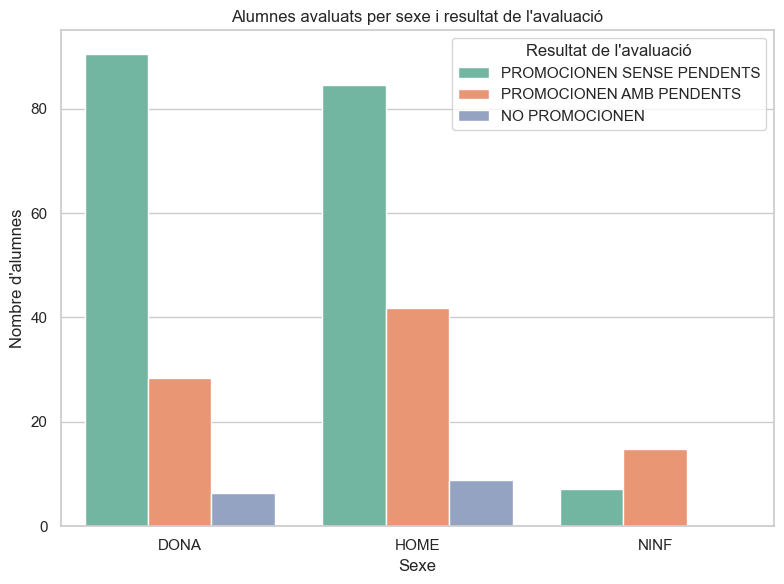

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Suponiendo que tu DataFrame se llama df ---
# Aseguramos el orden lógico de las categorías:
orden_resultats = ["PROMOCIONEN SENSE PENDENTS", "PROMOCIONEN AMB PENDENTS", "NO PROMOCIONEN"]

sns.set(style="whitegrid")

palette_1=sns.color_palette("rocket_r", as_cmap=True)
palette_2=sns.color_palette("Set2")

plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_bcn_filtered,
    x="Sexe",
    y="Alumnes avaluats",
    hue="Resultat",
    hue_order=orden_resultats,
    errorbar=None,
    palette=palette_2, 
)

plt.title("Alumnes avaluats per sexe i resultat de l'avaluació")
plt.xlabel("Sexe")
plt.ylabel("Nombre d'alumnes")
plt.legend(title="Resultat de l'avaluació", loc="upper right")
plt.tight_layout()
plt.show()

In [26]:
print(df_bcn_filtered.dtypes)

Sexe                object
Resultat            object
Alumnes avaluats     int64
Districte           object
dtype: object


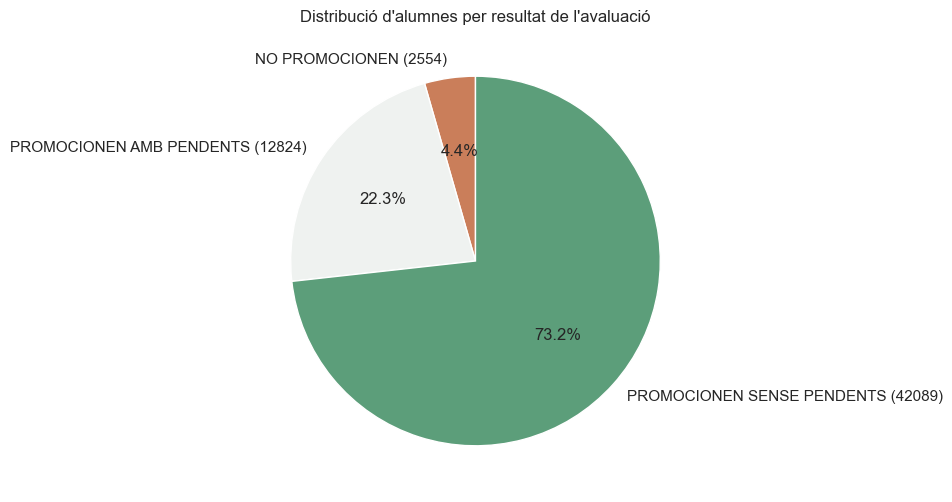

In [27]:
counts = df_bcn_filtered.groupby("Resultat")["Alumnes avaluats"].sum()

plt.figure(figsize=(6, 6))
plt.pie(
    counts,
    labels=[f"{idx} ({val})" for idx, val in zip(counts.index, counts)],
    autopct="%1.1f%%",
    startangle=90,
    #colors=sns.color_palette("pastel")[:len(counts)]
    colors=sns.diverging_palette(30, 145, s=60, l=60, n=len(counts))
)
plt.title("Distribució d'alumnes per resultat de l'avaluació")
plt.show()


In [28]:
df_bcn_filtered

,Sexe,Resultat,Alumnes avaluats,Districte
0,DONA,PROMOCIONEN AMB PENDENTS,1,CIUTAT VELLA
1,DONA,PROMOCIONEN SENSE PENDENTS,13,CIUTAT VELLA
2,HOME,PROMOCIONEN AMB PENDENTS,3,CIUTAT VELLA
3,HOME,PROMOCIONEN SENSE PENDENTS,14,CIUTAT VELLA
4,DONA,PROMOCIONEN AMB PENDENTS,3,CIUTAT VELLA
...,...,...,...,...
1197,DONA,PROMOCIONEN AMB PENDENTS,114,SANT MARTÍ
1198,DONA,PROMOCIONEN SENSE PENDENTS,351,SANT MARTÍ
1199,HOME,NO PROMOCIONEN,76,SANT MARTÍ
1200,HOME,PROMOCIONEN AMB PENDENTS,180,SANT MARTÍ


In [43]:
# Filtramos solo los que promocionan sin pendientes
df_pct_dist = (
    df_bcn_filtered.groupby("Districte").apply(
        lambda x: pd.Series({
            "total": x["Alumnes avaluats"].sum(),
            "promocionen_sense": x.loc[x["Resultat"] == "PROMOCIONEN SENSE PENDENTS", "Alumnes avaluats"].sum()
        })
    )
    .reset_index()
)

df_pct_dist["pct_promocionen_sense"] = (
    df_pct_dist["promocionen_sense"] / df_pct_dist["total"] * 100
)

df_barris_full = df_barris.merge(df_district_barri, on="BARRI_BCN")

df_barris_full = df_barris_full.merge(
    df_pct_dist[["Districte", "pct_promocionen_sense"]],
    on="Districte",
    how="left"
)



df_barris_full


C:\Users\anica\AppData\Local\Temp\ipykernel_52136\1829268052.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_bcn_filtered.groupby("Districte").apply(


,ID,BARRI,BARRI_BCN,CONTRAC,CONT1000H,VARCONTR,TRAMLLOG,LLOGUER,VARLLOG,LLOGTRIM,SUPMITJ,PREUM2,PREUM2TRIM,GEOMETRIA,Districte,pct_promocionen_sense
0,1,1,el Raval,555,21.983315,-9.016393,> 850 i <= 1000 euros/mes,944.205604,-4.555778,969.902984,60.693694,16.335153,16.626306,MULTIPOLYGON (((430607.335454264 4581881.57694...,CIUTAT VELLA,59.527972
1,2,2,el Barri Gòtic,269,19.092396,7.171315,> 1000 euros/mes,1205.260818,-1.030824,1276.712366,85.072727,16.485631,16.341041,MULTIPOLYGON (((431641.334436453 4581405.51038...,CIUTAT VELLA,59.527972
2,3,3,la Barceloneta,209,21.227406,88.288288,> 850 i <= 1000 euros/mes,902.107273,-14.397992,956.745773,45.227273,22.322604,22.387558,MULTIPOLYGON (((433088.289657605 4581798.87002...,CIUTAT VELLA,59.527972
3,17,17,Sants - Badal,251,19.207092,-5.283019,> 850 i <= 1000 euros/mes,926.416375,-4.633878,915.222826,58.722222,16.029918,16.406279,MULTIPOLYGON (((427385.147094413 4580381.23113...,SANTS - MONTJUÏC,62.233802
4,18,18,Sants,445,19.861598,-8.811475,> 850 i <= 1000 euros/mes,982.919348,-4.791220,1003.903860,64.510204,15.865071,16.106829,MULTIPOLYGON (((428338.31375162 4581328.092342...,SANTS - MONTJUÏC,62.233802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,68,68,el Poblenou,286,15.372903,-12.804878,> 1000 euros/mes,1165.961748,-7.392132,1192.638156,66.317829,18.165205,18.296693,MULTIPOLYGON (((434080.370452822 4582886.99018...,SANT MARTÍ,67.409285
69,69,69,Diagonal Mar i el Front Marítim del Poblenou,100,15.015238,-29.078014,> 1000 euros/mes,1725.708800,32.843503,1817.318654,87.461538,21.815672,22.894746,MULTIPOLYGON (((434942.39399708 4583968.355315...,SANT MARTÍ,67.409285
70,70,70,el Besòs i el Maresme,153,9.536785,56.122449,<= 750 euros/mes,717.511895,-18.806616,722.026400,60.978261,12.878175,12.380359,MULTIPOLYGON (((434942.39399708 4583968.355315...,SANT MARTÍ,67.409285
71,71,71,Provençals del Poblenou,191,14.713487,13.690476,> 1000 euros/mes,1061.899267,-6.878598,1145.021333,73.870370,16.475348,15.938421,MULTIPOLYGON (((434130.822881437 4584774.14668...,SANT MARTÍ,67.409285


In [46]:
df_pct_dist

,Districte,total,promocionen_sense,pct_promocionen_sense
0,CIUTAT VELLA,2288,1362,59.527972
1,EIXAMPLE,7850,6012,76.585987
2,GRÀCIA,3361,2699,80.303481
3,HORTA - GUINARDÓ,5904,4381,74.203930
4,LES CORTS,5079,4081,80.350463
5,NOU BARRIS,5635,3289,58.367347
6,SANT ANDREU,5866,4312,73.508353
7,SANT MARTÍ,7496,5053,67.409285
8,SANTS - MONTJUÏC,4414,2747,62.233802
9,SARRIÀ - SANT GERVASI,9574,8153,85.157719


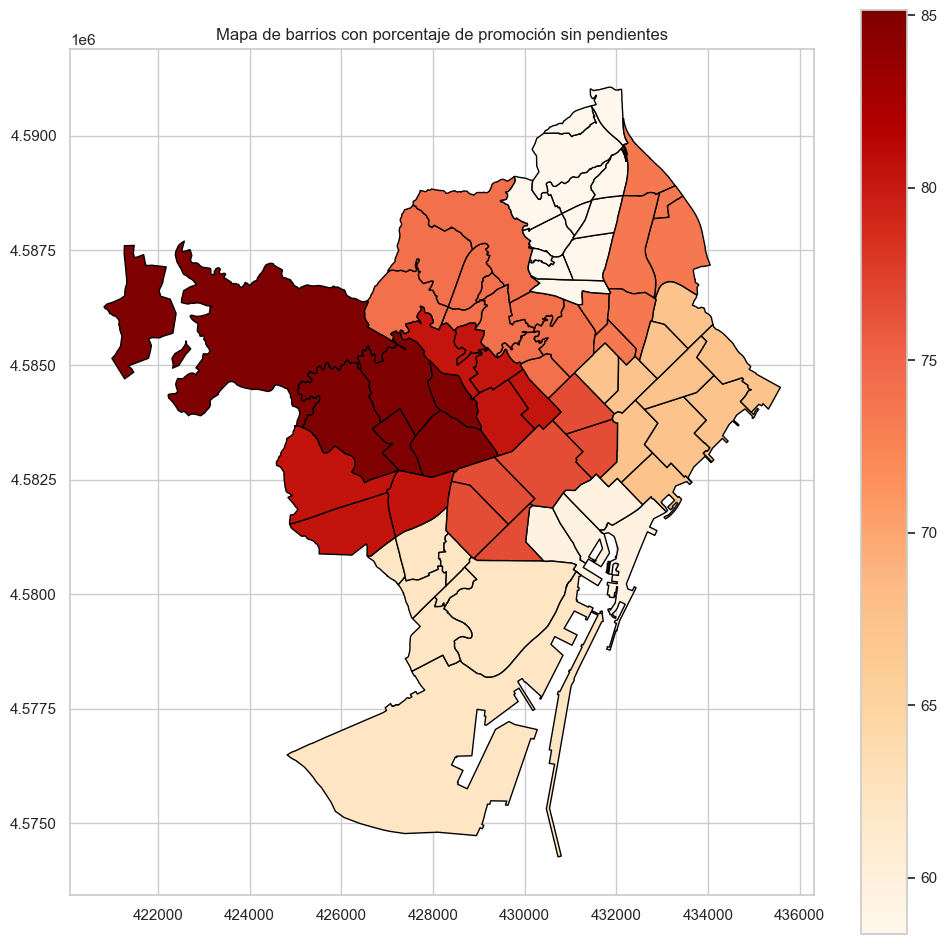

In [45]:
from shapely import wkt

if isinstance(df_barris_full["GEOMETRIA"].iloc[0], str):
    df_barris_full["GEOMETRIA"] = df_barris_full["GEOMETRIA"].apply(wkt.loads)
# Mantener solo geometrías válidas
df_barris_full = df_barris_full[df_barris_full["GEOMETRIA"].notna()]
df_barris_full = df_barris_full[df_barris_full["GEOMETRIA"].apply(lambda x: x.is_valid)]
import geopandas as gpd

gdf_barris = gpd.GeoDataFrame(df_barris_full, geometry="GEOMETRIA")

# Asignar CRS
gdf_barris = gdf_barris.set_crs(epsg=3857)  # si tus coordenadas están en metros
# O si están en lat/lon: epsg=4326

fig, ax = plt.subplots(figsize=(12,12))
gdf_barris.plot(column="pct_promocionen_sense", cmap="OrRd", legend=True, edgecolor="black", ax=ax)
plt.title("Mapa de barrios con porcentaje de promoción sin pendientes")
plt.show()